# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 With the advent of technology, societies have become more efficient with their lives. At the same time, however, individual human lives have also become more fast-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has in fact made it easier for humans with a shortage of time to find and consume good content.

Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume.

Spotify is one such audio content provider with a huge market base across the world. With the ever-increasing volume of songs becoming available on the Internet, searching for songs of interest has become a tedious task in itself. However, Spotify has grown significantly in the market because of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.

### **The objective:**

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **The key questions:**

- Can we identify specific trends in song preferences, and how do these preferences influence the discovery of new music?
- How does the number of song plays correlate with user engagement, and at what point does a song become a significant part of a user's playlist?
- How do we balance the importance of recall and precision in our recommendation system to optimize the user experience?
- What is the likelihood that enjoying one song from an album or by an artist indicates a predisposition to like other songs from the same album or by same artist, and can either of them be used to leverage in enhancing song discovery?

### **The problem formulation**:

- This system is designed to offer personalized and highly relevant music suggestions, drawing from a deep analysis of user listening habits, musical preferences, and interactions within the platform.
- To tackle this challenge from various perspectives, a diverse set of  recommendation models, including similarity-based collaborative filtering, matrix factorization techniques, clustering-based systems, and content-based recommendations will be verified. This will ensures that every user receives tailor-made recommendations to help them discover new songs and artists.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [6]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [8]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [9]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [10]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [11]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [12]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**
- The count dataset has 2 million records providing the number of times users have listened to songs.
- The second dataset, provides collection of 1 million songs out of which 17 songs have no title and 7 songs have no release names
- The missing information in song dataset is small so will have no impact to solution.


In [13]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = count_df.merge(song_df.drop_duplicates(), how = "left", on = "song_id")

# Drop the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis = 1)

## Name the obtained dataframe as "df"
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2054529,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [14]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

columns_encoded = df[['user_id','song_id']].apply(LabelEncoder().fit_transform)
df['user_id'] = columns_encoded['user_id']
df['song_id'] = columns_encoded['song_id']
df

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2054529,64590,3660,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,64590,3736,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,64590,3744,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,64590,3893,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [15]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [16]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [17]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [18]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [19]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [20]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print("Unique Users in the final dataset :", df_final['user_id'].nunique())

Unique Users in the final dataset : 3337


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print("Unique Songs in the final dataset :", df_final['song_id'].nunique())

Unique Songs in the final dataset : 620


Total number of unique artists

In [ ]:
# Display total number of unique artists
print("Unique Artists in the final dataset :", df_final['artist_name'].nunique())

Unique Artists in the final dataset : 247


In [ ]:
df_final['play_count'].describe()

count    138301.000000
mean          1.698614
std           1.088205
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: play_count, dtype: float64

#### **Observations and Insights:__________**
- we have a total of 3,337 unique users, 620 unique songs and 247 unique artists.
- If each user had listened to at least one unique song, we would expect 3337 * 620 observation, however our dataset contains only 138,301 observations, which is approximately 7% of the possible observations.
- With 247 artist and 620 unique songs, indicate on average only 2-3 songs per artist.
- With low number of unique songs, the direversity seems to be less

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final['song_id'].value_counts()[:10]

song_id
8582    1602
6293    1264
3567     982
4270     960
1286     920
7796     910
310      902
7998     820
352      802
2220     767
Name: count, dtype: int64

Most interacted users

In [ ]:
df_final['user_id'].value_counts()[:10]

user_id
61472    282
15733    240
37049    237
9570     204
10763    199
23337    196
75144    194
43041    193
26616    191
9097     190
Name: count, dtype: int64

Songs released on yearly basis

In [ ]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
songs_by_year = df_final.groupby('year').count()['title']
songs_by_year

year
0       23404
1969      244
1970      191
1971      139
1973      426
1974      617
1975      181
1976      504
1978      307
1979      376
1980      248
1981      270
1982      131
1983      115
1986     1172
1987      354
1988      592
1990      401
1991     1616
1992     1322
1993     1266
1994      748
1995      327
1996      643
1997     1511
1999     2206
2000     6281
2001     3286
2002     5741
2003     9716
2004     2823
2005     6029
2006     9004
2007    15623
2008    16626
2009    18554
2010     5307
Name: title, dtype: int64

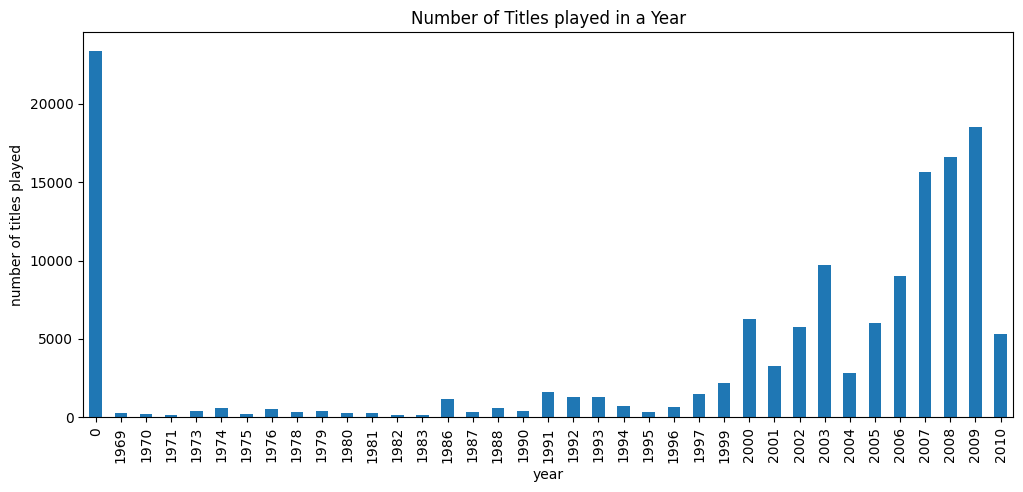

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (12, 5))

# Set the title of the plot
plt.title("Number of Titles played in a Year", fontsize = 12)

# Set the x label of the plot
plt.xlabel('year')

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
songs_by_year.plot(kind='bar')
plt.show()

#### **Observations and Insights:__________** #
- Data requires cleanup as over 23000 transactions has no year mentioned in the dataset.
- The older released songs, specifically prior to 2000 has less preference indicating either the application is used by younger generation or less number of titles are available
- A noticeable peak in plays from the years 2007 to 2009 indicating the chart is right-skewed distribution, suggesting that users may have a preference for newer songs, and/or a younger user have started using application in recent years or songs released in recent years might be more popular or accessible to users.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
count_play_count = df_final.groupby('song_id').count()['play_count']

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play_count = pd.DataFrame({'avg_count': average_play_count, 'play_freq': count_play_count})

# Let us see the first five records of the final_play dataset
final_play_count.head()

,avg_count,play_freq
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(data, n=10, min_interaction=100):

    # Get play frequency with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sort average count
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above

#First get list of top 10 song_id
top_n_song_id = list(top_n_songs(final_play_count,10))
print(top_n_song_id)

#Get the name of the song (title) for the list
print("\n")
list(df_final[df_final['song_id'].isin(top_n_song_id)]['title'].unique())

[7224, 6450, 8324, 9942, 8483, 5531, 657, 5653, 614, 2220]




['Sehr kosmisch',
 'Luvstruck',
 "You're The One",
 'Secrets',
 'Transparency',
 'Greece 2000',
 'Brave The Elements',
 'Victoria (LP Version)',
 'The Big Gundown',
 'Video Killed The Radio Star']

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357232 sha256=49101658849458b6eb773b84cf8f3e2007ba3fcd04810641e7eea43282425f57
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

**Calculation Formula : **

**Precision**: the fraction of the recommended songs that are relevant to the user.
Precision@k= {Recommended items that are relevant} / {Recommended items}

**Recall**: the fraction of relevant songs that are recommended to a user.
Recall@k= {Recommended items that are relevant} / {Relevant items}

F1_score@k= 2 / ((1 / Precision@k) + (1 / Recall@k))

An item is considered relevant if its true rating rui is greater than a given threshold. An item is considered recommended if its estimated rating ^rui is greater than the threshold, and if it is among the k highest estimated ratings.




In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale

# Since the rating contains only values in the [1, 5] range, use similar rating scale.
# Though 0 rating is not included, but that is also evaluated and has no overall impact.
reader = Reader(rating_scale = (1, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user, k=30 )     # also tested with k=20, 40

RMSE: 1.0817
Precision:  0.401
Recall:  0.705
F_1 score:  0.511


**Observations and Insights:_________**
- Using user-user similarity-based collaborative filtering model, with a precision of 0.401 and a recall of 0.705 that the model can identify a broad range of relevant songs
- This balance of precision and recall, denoted by F1 score of 0.511, ensuring that the recommendations meet user preferences without overwhelming them with irrelevant choices.

In [ ]:
# Select an user ID to test the model. Here user_id= 6958 is selected as it is mentioned in this project.
# Displaying the corresponding songs, that user '6958' listened to.

df_final[df_final['user_id'] == df_final.iloc[6958]['user_id']][df_final.columns.values[1:]].sort_values(by='song_id')

,song_id,play_count,title,release,artist_name,year,text
103486,22,1,Halo,Doll Domination 3.0,The Pussycat Dolls,2008,Halo Doll Domination 3.0 The Pussycat Dolls
103488,52,1,Halo,Halo,Beyoncé,2008,Halo Halo Beyoncé
103490,276,2,Up Up & Away,Man On The Moon: The End Of Day,Kid Cudi,2009,Up Up & Away Man On The Moon: The End Of Day K...
103492,334,1,Losing Touch,Day & Age,The Killers,2008,Losing Touch Day & Age The Killers
103493,462,1,Baby Boy [feat. Beyonce],Dutty Rock,Sean Paul,0,Baby Boy [feat. Beyonce] Dutty Rock Sean Paul
...,...,...,...,...,...,...,...
103628,9517,1,Black Balloon,Midnight Boom,The Kills,2008,Black Balloon Midnight Boom The Kills
103630,9771,1,Swing_ Swing,The All-American Rejects,The All-American Rejects,2003,Swing_ Swing The All-American Rejects The All-...
103631,9925,1,42,Viva La Vida Or Death And All His Friends,Coldplay,2008,42 Viva La Vida Or Death And All His Friends C...
103632,9925,1,42,Viva La Vida - Prospekt's March Edition,Coldplay,2008,42 Viva La Vida - Prospekt's March Edition Col...


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)    # try another song_id = 719 for the same user_id

user: 6958       item: 1671       r_ui = 2.00   est = 1.72   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.7227331119335394, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(6958, 3232, verbose = True)    # try another song_id = 7224 for the same user_id

user: 6958       item: 3232       r_ui = None   est = 1.68   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6776559989382887, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**
- The prediction made by our model for the combination of user 6958 and the song 1671, which had an actual rating of 2.00, was a close estimate at 1.72, indicating the model is closely aligned with the user's preferences.
- For the song 3232 that was not heard by user, the model estimated a rating of 1.68 indicating the song would be recommended to the user by our model


Now, let's try to tune the model and see if we can improve the model performance.

In [162]:
#Hyper parameters are more like handles available to control the output or the behavior of the algorithm used for modeling.
#They can be supplied to algorithms as arguments. For eg: model= DecisionTreeClassifier(criterion=’entropy’),
#here the criterion entropy is the hyper parameter passed.

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [40,50,60,70,80],                          #Max Number of neighbours we want to use to vote the category
              'min_k': [9, 11, 13, 15, 17],                   #Min number of neighbours to categorize a sample
              'sim_options': {'name': ['msd', 'cosine'],      #Trying MSD or cosine value as the similarity metric
                              'user_based': [True]}           #Stating that the model is user-based
              }

# Performing 3-fold cross-validation to tune the hyperparameters
  # Instead of RandomizedSearchCV (only few samples are randomly selected), use GridSearchCV (considers all possible combinations of hyper parameters)
gs = GridSearchCV(KNNBasic,                                 #Model type
                  param_grid,                               #Parameter grid
                  measures = ['rmse'],                      #Metrics to evaluate the model
                  cv = 3,                                   #3-fold-validation folds - means the data divided into 3 equal sized folds, then do 3x validation with each subset on the remaining data
                  n_jobs = -1)                              #Number of CPU cores for parallel processing (-1 means all cores)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0160650665784923
{'k': 60, 'min_k': 17, 'sim_options': {'name': 'msd', 'user_based': True}}


In [163]:
# Train the best model found in above gridsearch
sim_options = {'name': 'msd', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 60, min_k = 17, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(sim_user_user_optimized, k = 30)

RMSE: 1.0224
Precision:  0.443
Recall:  0.654
F_1 score:  0.528


**Observations and Insights:_________**
- The tunned hyperparameter reduced the RMSE to 1.0224, indicating an improvement in the estimation of ratings compared to the baseline model.
- The precision achieved is 0.443, suggesting that about 44% of the top 30 recommendations (k=30) are relevant to the users.
- The recall of 0.654 is slightly lower than the baseline model, but high enough to identify relevant songs.
- The F1 score of 0.528, slightly higher than the baseline model


In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958,1671,r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.50   {'actual_k': 60, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5035783994795053, details={'actual_k': 60, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.50   {'actual_k': 41, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.496431354065467, details={'actual_k': 41, 'was_impossible': False})

**Observations and Insights:______________**
- For song 1671, the baseline model predicted an estimated listening count of 1.72, however, the the hyperparameter tunned model adjusted this prediction to 1.50 indicating a slight decrease in the listening estimate an increase in the number of neighbors (k=60)
- Similarily for song 3232, while the baseline model estimated a listening value of 1.68, the optimized model has lowered this estimate to 1.50, also involving lesser neighbors (k=41)
- Thus the optimized model adjusts its predictions, reducing the recommendation of song


**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [164]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0,k=5)

[3, 6, 9, 11, 14]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [166]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    df_grouped = data.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
    user_item_interactions_matrix = df_grouped.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [167]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958 , 5, sim_user_user_optimized)

In [169]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

#pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])['predicted_play_count'].agg(['min', 'max'])

,song_id,predicted_play_count
0,7224,3.434130
1,5344,2.701891
2,3951,2.668535
3,5653,2.586124
4,6450,2.544423


**Observations and Insights:______________**
1. For user 6958, the optimized model has generated the top five song recommendations based on the estimated predictive ratings. The song ID 7224 with a predicted rating of 3.43, indicating a high level of expected affinity between this song and the user's preferences.
2. Comparing these recommendations to the previously mentioned song 3232 that has prediction of 1.50, significantly short of reaching the threshold to be considered among the top recommendations for this user.


### Correcting the play_counts and Ranking the above songs

In [170]:
def ranking_songs(recommendations, data):

  # Sort the songs based on play counts
  # ranked_songs = data.loc[[songs[0] for songs in recommendations if song['song_id'] in df_final['song_id']]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()
  ranked_songs = data.loc[[songs[0] for songs in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  # To avoid bias towards extremely popular songs, subtracting 1/sqrt(n) used giving more chances to less popular yet potentially relevant songs for the user.
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [171]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play_count)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,109,3.434130,3.338348
1,5344,123,2.701891,2.611724
0,3951,128,2.668535,2.580147
2,5653,110,2.586124,2.490778
3,6450,110,2.544423,2.449077


**Observations and Insights:______________**
-  By correcting play cunt and ranking, the top 5 recommended songs are ordered not just by their original popularity but also by a corrected play count that adjusts predictions based on the play frequency.
- The song ID 7224, has the highest corrected play count in this list (not the most frequent play), followed by songs 5344, 3951, 5653, and 6450.

### Item Item Similarity-based collaborative filtering recommendation systems

In [172]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item)

RMSE: 1.0320
Precision:  0.316
Recall:  0.572
F_1 score:  0.407


**Observations and Insights:______________**
- The item-item similarity model shows an improvement in RMSE compared to the baseline user-user similarity model, indicating more accurate rating estimations. However, it decrease in precision and recall, leading to a lower F1 score. This suggests that, although the item-item model is more accurate in predicting exact ratings, it might not be as effective in identifying a broad set of relevant items for each user.


In [173]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(6958, 1671, r_ui = 2 ,verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.37   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3695958289911163, details={'actual_k': 18, 'was_impossible': False})

In [174]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.36   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3565368486337936, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:______________**
- For user 6958 and song 1671, the item-item model estimates a listening value of 1.37, which is notably lower than the estimates provided by the user-user baseline model of 1.75. This indicates, using the item-item model, user 6958 has less affinity towards song 1671 compared to the evaluations from the user-user models.
- For song 3232, the item-item model predicts a listening value of 1.36, is also below the baseline user-user model's prediction (1.64). This indicates a tendency of the item-item model to make more conservative estimates regarding the likelihood of a user listening to a song.



In [175]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 30, 40, 50],
              'min_k': [1, 3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.016089657429563
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [176]:
# Apply the best model found in the grid search
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0239
Precision:  0.361
Recall:  0.568
F_1 score:  0.441


**Observations and Insights:______________**
- the difference in RMSE is minimal between the basedline and the optimized version of the item-item similarity-based collaborative filtering model
- The improvement in precision indicates that a higher proportion of recommendations made by the optimized model are relevant to the users.
- The optimized model shows a slight decrease in recall. Despite this small decline, the model remains capable of identifying more than half of the relevant items.
- In F_1 score improvement over the baseline model's suggests a better overall balance between precision and recall in the optimized model


In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3443288352862968, details={'actual_k': 18, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.37   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.365441491381888, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:______________**
-  For song 1671, the optimized item-item model estimates slightly lower than the baseline item-item model's estimate and notably lower than the estimates provided by the user-user models. This decrease in the estimate suggests potentially reducing the likelihood of recommending songs that might not be of significant interest to the user.
- Regarding song 3232, the optimized item-item model presents a slightly higher prediction than the item-item baseline model but lower than the predictions from the user-user models.


In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0,5)

[13, 16, 18, 29, 39]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958 , 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,8801,1.997649
1,6860,1.956425
2,4939,1.919901
3,8483,1.907193
4,3165,1.871977


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play_count)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,8801,87,1.997649,1.890437
1,6860,177,1.956425,1.881260
2,4939,138,1.919901,1.834775
0,3165,368,1.871977,1.819848
3,8483,130,1.907193,1.819487


**Observations and Insights:_________**
- The item-item similarity model has recommended a series of songs to user 6958, having corrected play counts around 1.8, indicating a moderate preference according to the model's predictions.
- With higher corrected play count in using user-user model, predicts a higher affinity of user 6958 towards the recommended songs compared to the item-item model.



### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(svd)

RMSE: 1.0026
Precision:  0.432
Recall:  0.654
F_1 score:  0.52


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3330243078163533, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.30   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2983047805615977, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [177]:
# Set the parameter space to tune
param_grid = {'n_epochs': [20, 30, 40, 50, 60],
              'lr_all': [0.005, 0.01, 0.05],
              'reg_all': [0.02, 0.1, 0.2]}

param_distributions  = {'n_factors': list(range(30,150,10)),
                        'reg_all': np.arange(0.02,0.2,0.02),
                        'n_epochs' : list(range(1,51)),
                        'lr_all': [0.005, 0.01, 0.05]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9739356381445274
{'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [178]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 50, lr_all = 0.01, reg_all = 0.1, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(svd_optimized)

RMSE: 0.9848
Precision:  0.443
Recall:  0.641
F_1 score:  0.524


**Observations and Insights:_________**
- The baseline model for matrix-based collaborative filtering shows an RMSE of 1.0026, a precision of 0.432, a recall of 0.654, and an F1 score of 0.52. On the other hand, the optimized SVD model improves the RMSE to 0.9848, indicates a slightly higher precision of 0.443, and recall to 0.641, resulting in higher F1 score of 0.524.
- This hyperparameter optimized model using matrix factorization performs very close to the optimized user-user collaborative filtering model


In [179]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.35   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3538270604570675, details={'was_impossible': False})

In [180]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3421184015055698, details={'was_impossible': False})

**Observations and Insights:_________**
-  The predictions for user 6958, the baseline model estimates a listening value of 1.33 for song 1671 and 1.30 for song 3232. The optimized model adjusts these predictions to 1.31 and 1.32, respectively.
- This model is underperforming the accuracy of predictions.


In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)
pd.DataFrame(svd_recommendations, columns = ['song_id', 'predicted_ratings'])

In [181]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play_count)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,109,2.907980,2.812198
0,4636,443,2.388700,2.341189
3,7747,99,2.326717,2.226214
1,657,159,2.153443,2.074138
4,4831,98,2.162283,2.061267


**Observations and Insights:_________**
- The recommendations generated by the optimized SVD model for user 6958 feature a range of corrected play counts between 2.81 to 2.06. The song with ID 7224 tops the list with the highest corrected count. These recommendations indicate that the optimized SVD model has effectively identified a set of songs that closely align with the user's preferences.
- The inclusion of song ID 4636, which has a high play count (443) and a high corrected play count value (2.34), highlights the optimized SVD model can balance overall song popularity with individual user preferences.


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [183]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(clust_baseline)

RMSE: 1.0389
Precision:  0.398
Recall:  0.594
F_1 score:  0.477


In [184]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3627795906030837, details={'was_impossible': False})

In [185]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.55   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5488944215348255, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [186]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2, 3, 4, 5, 6],
              'n_cltr_i': [2, 3, 4, 5, 6],
              'n_epochs': [10, 20, 30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0223907073649432
{'n_cltr_u': 2, 'n_cltr_i': 5, 'n_epochs': 40}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [187]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 2, n_cltr_i = 5, n_epochs = 40, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(clust_tuned)

RMSE: 1.0335
Precision:  0.393
Recall:  0.575
F_1 score:  0.467


**Observations and Insights:_________**
- The baseline model shows an RMSE of 1.0428, a precision of 0.398, a recall of 0.594, and an F1 score of 0.46776.
- On the other hand, the optimized model slightly improves across all metrics: the RMSE decreases to 1.0335, indicating an improvement in the accuracy of rating predictions; precision remains almost unchanged with a slight decreae to 0.393; recall lowers to 0.575,and the F1 score increases to 0.467.
- The optimized co-clustering model is underperforming to the baseline co-clustering model.

In [188]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.08   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.0772404183180317, details={'was_impossible': False})

In [189]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict(6958, 3232,  verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3054076498265865, details={'was_impossible': False})

**Observations and Insights:_________**
- The prediction made by the baseline model for song 1671, estimated at 1.36, reflects a undervaluation compared to the actual rating of 2.00 provided by user 6958. On the other hand, the optimized model lowers it to 1.08. This outcome suggests that the clustered based model might struggle to accurately capture the user's preferences regarding this song.
- Regarding song 3232, the baseline model provides an estimate of 1.55, suggesting moderate expectations of acceptance by the user, despite there being no previous ratings for this song. The optimized model, in turn, slightly adjusts this prediction downward, with an estimate of 1.31. This decrease in the estimate from the optimized model could be interpreted as a more cautious approach to predicting the user's acceptance of new songs

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [190]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final,6958, 5, clust_tuned)
pd.DataFrame(clustering_recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.775809
1,6450,2.531450
2,8483,2.038548
3,1674,1.926506
4,5653,1.923154


### Correcting the play_count and Ranking the above songs

In [191]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play_count)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,109,2.775809,2.680026
2,6450,110,2.531450,2.436103
0,8483,130,2.038548,1.950842
1,1674,121,1.926506,1.835596
3,5653,110,1.923154,1.827807


**Observations and Insights:_________**
- The optimized cluster-based recommendation model exhibits notable alignment with both the optimized SVD and user-user similarity models, especially in recommending song 7224, which is highlighted across these models with very similar and moderately high corrected play count values. This consistency underscores the perceived relevance of song 7224 for user 6958, highlighting its potential to be particularly appreciated by the user.
- Furthermore, the optimized cluster model and the optimized user-user similarity model both recommend song 5653, reinforcing the notion that certain songs maintain their appeal across different recommendation methodologies. This coherence is indicative of the robustness of the predictions generated by these models.


### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [21]:
# Consider "title", "release", "artist_name" and create a new column called "text"

df_small = df_final
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [22]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text'
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop duplicate titles
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [23]:
# Create the series of indices from the data
title_series = pd.Series(df_small.index)

In [24]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [25]:
# Create a function to tokenize the text. Returns: A list of the tokens obtained from the text.
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [26]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()
pd.DataFrame(song_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

#similar_songs
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [31]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = title_series[title_series == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [32]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Daisy And Prudence',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go']

**Observations and Insights:_________**
- The content-based recommendation model merges key song information, such as title, album, and artist, into a unique text for each song, using text processing techniques and find similarities between songs setting it apart from other models.
- The final result of the model, recommending songs like "Big Me", "Everlong", and "The Pretender" in response to "Learn To Fly", demonstrates the model is effective not only in capturing the user's general affinity for a particular artist but also in suggesting diversity within that specific interest.
- When comparing the content-based model with others such as user-user, item-item, optimized SVD, and cluster-based, it stands out to discover and recommend music based directly on the descriptive characteristics of the songs.


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

- Among all the models evaluated, the user-user collaberative model stood out for offering a good balance between precision and recall providing personalized and relevant recommendations based on the interactions and preferences of similar users.
- The item-item collaberative model did not achieve similar performance as the user-user model in terms of the F1 score indicating item interactions are more sporadic or less dense.
- The optimized matrix factorization (SVD) model excelled in the accuracy of user rating predictions, achieving a suitable balance between precision and recall and almost similar result as user-user collaberative model
- The cluster based model grouped users with similar preferences, however it has similar results in terms of overall balance between precision and recall.
- Though the content based model recommended songs based directly on descriptive characteristics, but in terms of precision, recall and F1 score the results were similar to item-item collaberative and/or cluser based model.
- The optimized user-user and SVD model were identified as better performing models for its robustness, flexibility, and scalability.


**2. Refined insights**:
- It seems recently release songs have clear preference indicating probability of younger audience using the music app
- A selective interaction between users and songs within the platform (app 7%)
- Huge amount of music played has no year information available


**3. Proposal for the final solution design:**
- It is proposed to adopt a hybrid model that combines with the optimized user-user model with content-based approaches. This would allow user satisfaction by balancing relevant and personalized discoveries.
- - Adapt the system to dynamic changes in users preferences and explore improvement in interpretation and recommendations for future development.
- The significant presence of certain songs and artists within the recommendations highlights the importance of considering both popularity and personal relevance when designing the recommendation system.
- Additional information related to both songs and user preference like genere etc. should be captured that can help better recommendation
- A mechanism should be included in the recommendation to introduce lesser heard songs, generating interest in older music to younger audience.
